In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib
from scipy.signal import find_peaks

In [2]:
class spek:
    def __init__(self,path):
        self.path=path
        data=np.loadtxt(path)
        self.steps=[]
        self.intensity=[]
        self.ru_lines=[495.31,496.39,498.34,501.61,502.30,506.40,507.2,507.66,508.94,513.39,515.15,517.11,519.67,523.54,526.15,532.38,536.41,539.21,543.31,558.03,564.93,565.53,572.57,589.16,589.75,620.8,630.01,607.24,616.13]
        for line in data:
            self.steps.append(line[0])
            self.intensity.append(line[1])
        self.steps,self.intensity=np.array(self.steps),np.array(self.intensity)
        self.peaks_index=self.peaks()
        self.parameter, self.parameter_err,self.steps_cali,self.steps_cali_err=self.cali()
        print(self.parameter, self.parameter_err)

    def peaks(self):
        peaks_arr=find_peaks(self.intensity,height=0.01)[0]
        if self.path=="data/ru_spektrum.dat":
            peaks_arr=np.delete(peaks_arr,[0,1,2,14])
            peaks_arr=np.append(peaks_arr,[3664,3796])
        return peaks_arr

    def cali(self):
        p,pcov=np.polyfit(self.steps[self.peaks_index],self.ru_lines,2,cov=True)
        perr=np.sqrt(np.diag(pcov))
        steps_cali=p[0]*self.steps**2+p[1]*self.steps+p[2]
        steps_cali_err=np.sqrt(np.sum(np.abs(steps_cali-self.steps))/len(self.steps))
        #//alt version with error as standard deviation
        steps_cali_err=
        return p,perr,steps_cali,steps_cali_err

    def plot_spectrum(self):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Rubidium Spektrum gemessen mit dem Prismenspektrometer")
        fig1.set_ylabel("Intensity in a.u.")
        fig1.set_xlabel("pmt Position")
        fig1.set_xlim(10000,40000)
        fig1.plot(self.steps,self.intensity,label=f"Gemessenes Ru-Spektrum")
        fig1.plot(self.steps[self.peaks_index],self.intensity[np.array(self.peaks_index)],"o",label="Identifizierte Peaks")
        plt.tight_layout()
        plt.legend()
        plt.savefig("plots/Ru_spectrum1.pdf")
        plt.show()

    def plot_cali(self):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Kalibration des Prismenspektrometers mittels eines Rubidium Spektrums")
        fig1.set_ylabel("$\lambda_{Ru}$ in nm")
        fig1.set_xlabel("pmt Position")
        fig1.set_xlim(10000,40000)
        fig1.scatter(self.steps[self.peaks_index],self.ru_lines,c="C0",label="Gemessene Peaks")
        fig1.plot(self.steps,self.steps_cali,c="C0",label="Fit")
        fig1.plot(self.steps,self.steps_cali-self.steps_cali_err,c="C0",ls="--",label="Fehlerschlauch zum Fit")
        fig1.plot(self.steps,self.steps_cali+self.steps_cali_err,c="C0",ls="--")
        plt.tight_layout()
        plt.legend()
        plt.savefig("plots/Ru_cali1.pdf")
        plt.show()

[7.05835870e-08 1.01924329e-03 4.75424576e+02] [1.6924379e-09 8.6105632e-05 9.8094030e-01]


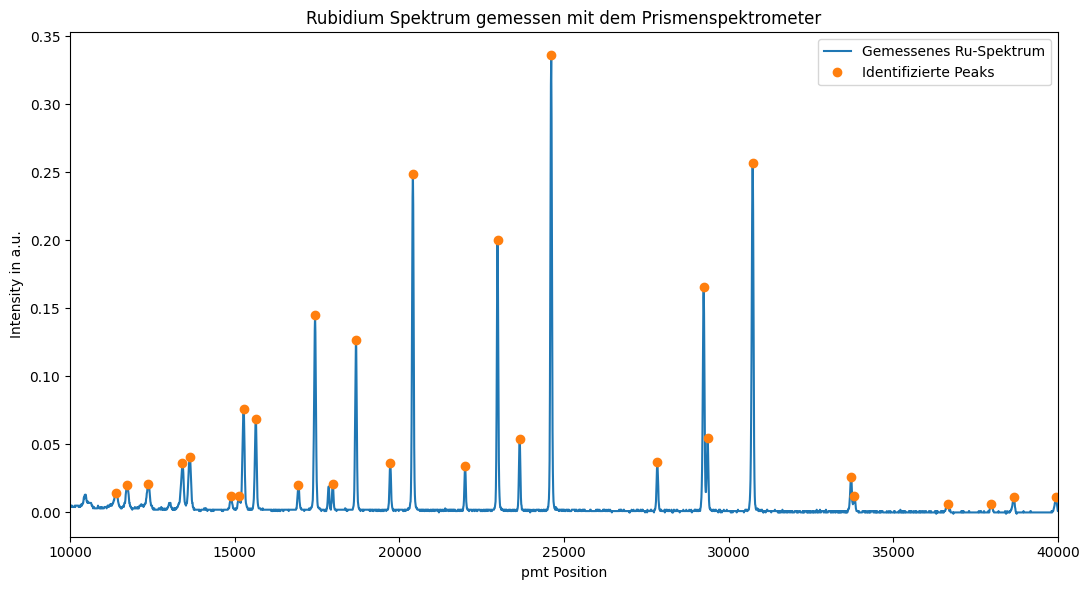

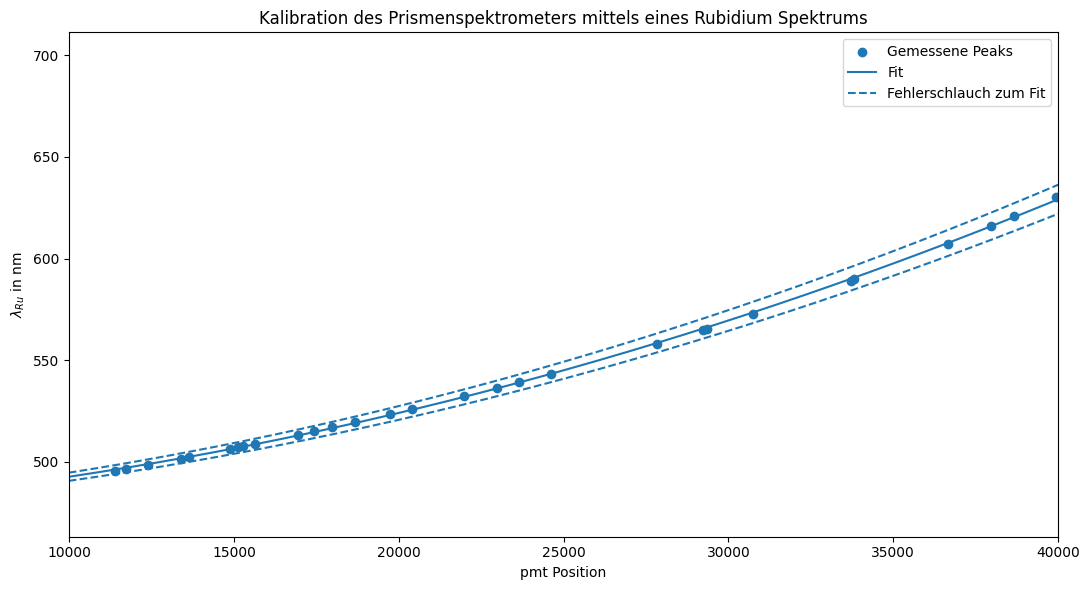

In [3]:
file="ru_spektrum.dat"
spek1=spek(f"data/{file}")
spek1.plot_spectrum()
spek1.plot_cali()